In [1]:
import pandas as pd
import numpy as np
import matplotlib as plot
import seaborn as sns

df = pd.read_csv('TELCO_Data.csv')

# RELATE IT TO HABIT FORMATION?

- The big 3 Laws of healthy habit formation (use these to get them set up with the sticky trap options):
    1. Make it Obvious
        - Advertise family and partner plans
    2. Make it Attractive
        - Provide one-time incentives to sweeten the pot for new signees to family or partner plans
    3. Make it Easy
        - Make enrolling in family plans and autopay easy and enjoyable
    4. Make it Satisfying
        - Provide incentives like autopay discounts and tiered rewards based on number of lines
    
- The inverse (use these to make them less likely to leave):
    1. Make it Invisible
        - Keep visibility of downgrades or alternatives to a minimum
    2. Make it unattractive
        - Emphasize the forfeiture of discounts or perks
    3. Make it Difficult
        - Make the process to downgrade or shift plans more involved than the initial enrollment process
    4. Make it Unsatisfying
    

# What's the Angle?
- We need to advertise and incentivize partner or family plans (those with partners and dependents are less likely to leave).
- We should also introduce an auto-pay discount, that way their bill is being paid without the amount being brought to their attention every month. 

# Main Points:
- Focus on Family: focus on pushing family/partner plans with special rates or perks
- Auto-Pay to Make 'Em Stay: 

# Key Takeaways from Analysis:
- the monthly churn rate (26.5%) appears to be over 13x the 'normal' churn rate for telecom companies
- the average cost to replace these churned customers *just this month* would be around \\$298. That's \\$556,665.40 for all of them, which would mean almost \\$6.7 Million if future months continue this trend.
- People who churned had higher monthly charges on average than those who did not.
- People with lower tenure are more likely to churn.
- People who have partners are much less likely to churn.
- People with dependents are much less likely to churn. 
- People on autopay are much less likely to churn.

In [2]:
df.loc[700:750, :]

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
700,1032-MAELW,Female,0,Yes,Yes,2,1,1,Electronic check,78.45,5333.35,No,68.0
701,1035-IPQPU,Female,1,Yes,No,2,2,0,Electronic check,103.50,6479.40,No,62.6
702,1036-GUDCL,Male,0,Yes,Yes,1,1,0,Credit card (automatic),79.05,4663.40,No,59.0
703,1038-RQOST,Male,0,Yes,Yes,1,0,0,Mailed check,20.60,414.95,No,20.1
704,1038-ZAGBI,Female,0,Yes,Yes,1,0,1,Bank transfer (automatic),19.80,229.60,Yes,11.6
705,1041-RXHRA,Female,0,No,No,1,2,0,Bank transfer (automatic),70.25,2868.05,Yes,40.8
706,1042-HFUCW,Female,0,No,Yes,1,1,1,Credit card (automatic),54.75,1266.35,No,23.1
707,1043-UXOVO,Female,0,No,No,2,2,2,Credit card (automatic),113.15,7993.30,No,70.6
708,1043-YCUTE,Male,0,Yes,No,2,0,2,Credit card (automatic),25.15,1327.15,Yes,52.8
709,1045-LTCYT,Female,0,Yes,Yes,1,0,0,Credit card (automatic),21.05,139.75,No,6.6


## Some general data cleanup:

In [3]:
# Changing senior citizen row to boolean values. 

df['is_senior_citizen'] = df['is_senior_citizen'].replace([0, 1],['No', 'Yes']).astype('object')

In [4]:
df['service_type'] = " "

In [5]:
df.loc[0, 'service_type'] = 'Phone'

In [6]:
for i in range (df.shape[0]):
    if ((df.loc[i, 'phone_service'] != 0) & (df.loc[i, 'internet_service'] != 0)):
        df.loc[i, 'service_type'] = 'Both'
    elif df.loc[i, 'phone_service'] != 0 and df.loc[i, 'internet_service'] == 0:
        df.loc[i, 'service_type'] = 'Phone'
    elif df.loc[i, 'phone_service'] == 0 and df.loc[i, 'internet_service'] != 0:
        df.loc[i, 'service_type'] = 'Internet'

In [7]:
df.service_type.value_counts()

Both        4837
Phone       1529
Internet     683
Name: service_type, dtype: int64

In [8]:
df['is_auto_pay'] = ' '

In [9]:
for i in range(df.shape[0]):
    if 'automatic' in df.loc[i, 'payment_type']:
    #if list(df['payment_type'].str.contains('automatic')):
        df.loc[i, 'is_auto_pay'] = 'Yes'
    elif 'automatic' not in df.loc[i, 'payment_type']:
        df.loc[i, 'is_auto_pay'] = 'No'

In [10]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7039,7040,7041,7042,7043,7044,7045,7046,7047,7048
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
is_senior_citizen,No,No,No,Yes,Yes,No,Yes,No,Yes,No,...,No,Yes,No,No,No,No,No,No,No,No
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,Yes,Yes
phone_service,1,2,1,1,1,1,1,2,1,2,...,1,1,1,1,1,1,2,1,1,0
internet_service,1,1,2,2,2,1,2,2,1,1,...,0,2,2,2,0,1,2,1,1,1
contract_type,1,0,0,0,0,0,2,2,0,2,...,0,1,1,0,0,1,0,0,2,2
payment_type,Mailed check,Mailed check,Electronic check,Electronic check,Mailed check,Credit card (automatic),Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,...,Mailed check,Bank transfer (automatic),Mailed check,Mailed check,Bank transfer (automatic),Mailed check,Electronic check,Mailed check,Mailed check,Electronic check
monthly_charges,65.6,59.9,73.9,98.0,83.9,69.4,109.7,84.65,48.2,90.45,...,18.9,84.95,94.05,70.15,20.95,55.15,85.1,50.3,67.85,59.0


## Step 1: Define your goal. What's the impact? Who benefits? Why does this matter?

- What is our goal?
    - Understand the drivers of customer churn. 
    
- Why does customer churn matter?
    - In the simplest of terms, customer churn means lost revenue.
    - Keeping customers is much cheaper than trying to obtain new ones. 
    - https://www.zendesk.com/blog/customer-churn-rate/
    - https://www.netsuite.com/portal/resource/articles/human-resources/customer-churn-analysis.shtml?mc24943=v2
    
- What's our target variable?
    - Customer churn is the target variable. We have a yes/no for whether someone left. 
    
- What are some interesting variables?
    - churn (this is a monthly value)
    - monthly_charges
    - tenure
    - contract_type
    - dependents
    - partner
    - I want to create another variable that determines whether someone has both phone *and* internet.
    
- What does an MVP look like?
    - What target rate are we trying to hit with churn?
        - A 'normal' churn rate in telecommunications is 1.9% - 2.1%
        - http://www.dbmarketing.com/telecom/churnreduction.html
    - What's the biggest story or two?
        - The cost of replacing customers (maybe illustrate how much moving the needle even something like 5 or 10 percent can help)
    - Defining a deliverable:
        - Need to create a short, 3 minute presentation of analysis and recommendations. 
        
- Data Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

<AxesSubplot:>

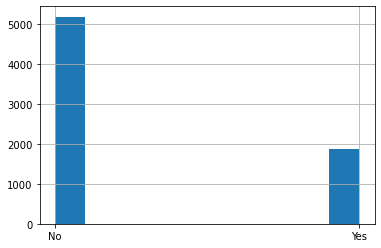

In [11]:
#The target variable is churn, so I want to know the percentage of churn in the last month:

df.churn.hist()

In [12]:
#It looks like churn is pretty high, but I want to see the numbers:

df.churn.value_counts()

No     5179
Yes    1870
Name: churn, dtype: int64

In [13]:
#Percentage of customers that churn:
(df[df.churn == 'Yes'].shape[0] / df.shape[0]) * 100

#It looks like the monthly churn rate is about 26.5%, which is alarmingly high.

26.528585614980848

In [14]:
# How does this compare to the 1.9 - 2.1% that is considered 'normal'? We'll assume a 2% churn as normal:
((df[df.churn == 'Yes'].shape[0] / df.shape[0]) * 100) / 2

# So our churn is over 13x the conventional average. 

13.264292807490424

In [15]:
#How much money is lost (monthly) when these customers leave?

df[df.churn == 'Yes'].monthly_charges.sum()

139161.35

In [16]:
#How much money would this be over the course of the year, assuming we lost no further customers?
df[df.churn == 'Yes'].monthly_charges.sum() * 12

#So the lost revenue over the course of a year from these customers alone is almost $1.7M.

1669936.2000000002

# How much does it cost on average to obtain a new telecom customer?
- "The average costs of acquisition are about four times average monthly ARPU," so we'll assume that 4 months' revenue will be the cost of replacing a churned user. 
- https://stlpartners.com/research/telco-economics-mobile-churn-rates-and-reduction-strategies/

In [17]:
# Given the above, how much would it cost us to replace these users?

(df[df.churn == 'Yes'].monthly_charges.sum() / df[df.churn == 'Yes'].shape[0]) * 4

#The average cost to replace a user lost to churn is about $298. 

297.67133689839574

In [18]:
# How much would this be, total, for all customers lost this month?
((df[df.churn == 'Yes'].monthly_charges.sum() / df[df.churn == 'Yes'].shape[0]) * 4) * (df[df.churn == 'Yes'].shape[0])

# The cost to replace the customers lost this month would be around $556,000.

556645.4

In [19]:
# Assuming a fiscal year that consists of months like this, what's the yearly cost of replacing churned users?
(((df[df.churn == 'Yes'].monthly_charges.sum() / df[df.churn == 'Yes'].shape[0]) * 4) * (df[df.churn == 'Yes'].shape[0]) *12)

#The cost of customer acquisition *just to replace churned customers* would be almost $6.7 million.

6679744.800000001

# What are the big drivers of customer churn?
- Key hypotheses to test:
    - There is a relationship between churn and monthly charges
    - People with longer tenure will be less likely to leave
    - Is there a relationship between whether a customer has a partner or dependents and whether they churn?

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

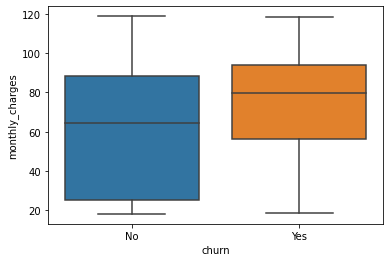

In [20]:
#It appears that those who churned have higher average monthly charges.

sns.boxplot(x = "churn", y = "monthly_charges", data = df)

<AxesSubplot:xlabel='churn', ylabel='tenure'>

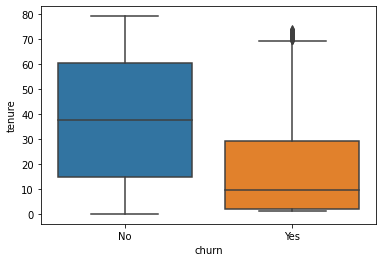

In [21]:
sns.boxplot(x = 'churn', y = 'tenure', data = df)

#It does indeed appear that people with lower tenure are more likely to churn

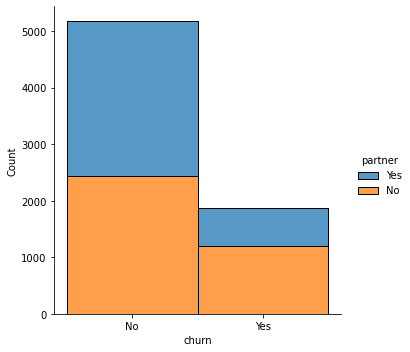

In [22]:
sns.displot(data = df, x = 'churn', hue = 'partner', multiple = 'stack')

#It appears that people who churn are less likely to have partners.

#We could maybe advertise an incentive on shared or family plans. 

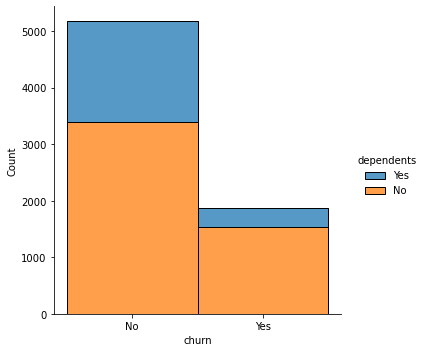

In [23]:
sns.displot(data = df, x = 'churn', hue = 'dependents', multiple = 'stack')

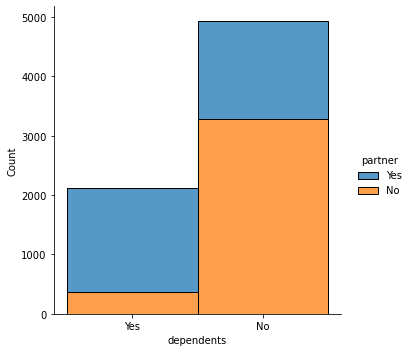

In [24]:
sns.displot(data = df, x = 'dependents', hue = 'partner', multiple = 'stack')

#It looks like people with dependents are much less likely to churn. 

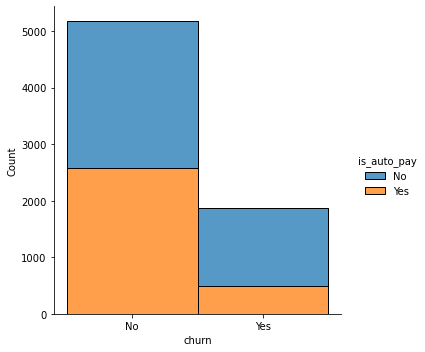

In [25]:
sns.displot(data = df, x = 'churn', hue = 'is_auto_pay', multiple = 'stack')

#It looks like those who churn are MUCH less likely to be signed up for autopay. 